# Attention Is All You Need
- attention 만 잘 활용해도 모든 것을 할 수 있다

## 딥러닝 기반의 기계 번역 발전 과정
- 2021년 기준으로 최신 고성능 모델들은 Transformer 아키텍처를 기반으로 하고 있다.
- GPT : Transformer의 디코더 아키텍처를 활용
- BERT : Transformer의 인코더 아키텍처를 활용

** 입력 시퀀스 전체에서 정보를 추출하는 방향으로 발전 >>

기존에는 인코더와 디코더를 함꼐 활용하는 복잡한 RNN과 CNN을 Sequence간 변화를 활용하여 사용했다.

본 논문에서는 Transformer라는 아키텍처를 제안하고 이는 only attentionmecahnism만 활용하였다.

## 기존 Seq2Seq 모델들의 한계점

- context vextor v에 소스 문장의 정보를 압충합니다
- 병목현상이 발생하여 성능 하락의 원인이 된다.

매번 단어가 입력될 때마다 hidden state 값이 새롭게 갱신되고 이전까지 입력되었던 단어들의 정보가 차례대로 입력되어
마지막 단어가 입력되었을 때 hidden state 값이 되기 때문에 시간이 굉장히 오래 걸린다.

소스문장을 대표하는 고정된 크기의 vector를 만들어야한다는 점에서 다양한 경우에 대해 고정된 크기로 만드는 것은 병목현상을 유발한다.

하나의 문맥 벡터가 소스 문장의 모든 정보를 가지고 있어야 하므로 성능이 저하됩니다.

그렇다면 매번 소스 문장에서의 출력 전부를 입력으로 받으면 괜찮지 않을까?
- 최근 GPU는 많은 메모리와 빠른 병렬 처리를 지원하기 때문에 전반적인 모든 내용을 한번에 다 반영한다.
- 고정된 VECTOR값으로 압축하는 과정을 생략하자
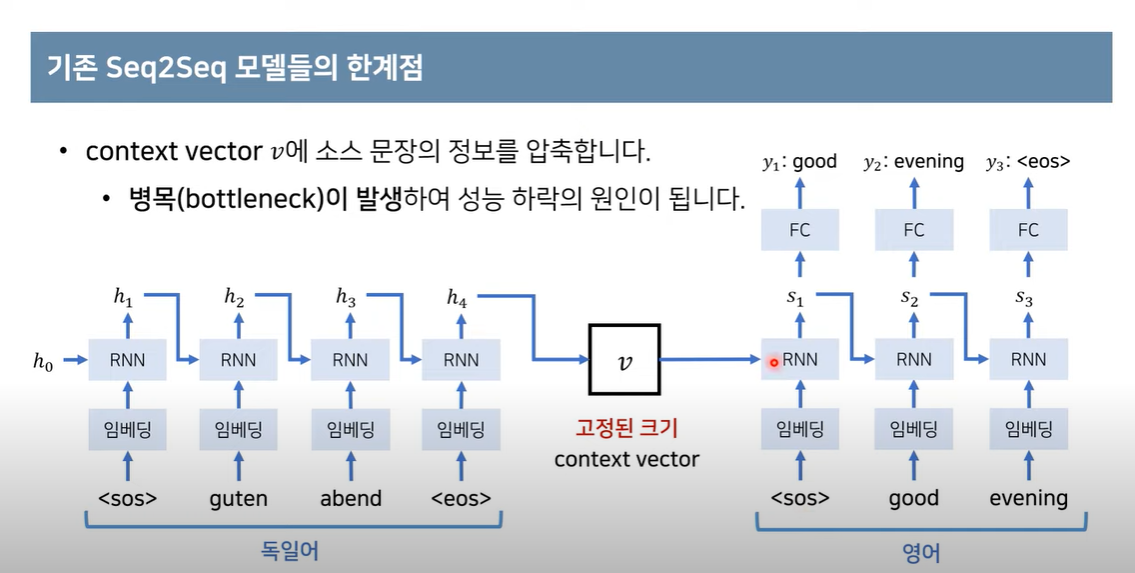

## Seq2Seq with Attention

매번 출력할 때마다 모든 단어의 출력값을 고려하겠다.

- Seq 모델에 어텐션 매커니즘을 사용한다.
- 디코더는 인코더의 모든 출력(output)을 참고한다.
- 어떤 단어의 중점을 줄 것인지에 대한 E값을 Soft Max에 취해서 어떤 vector에 가중치를 곱하여 비율에 맞게 더해준다,
- W값을 출력값에 반영해주기 위한 과정임

## Transformer is the first transduction model relying entirely on self-attention

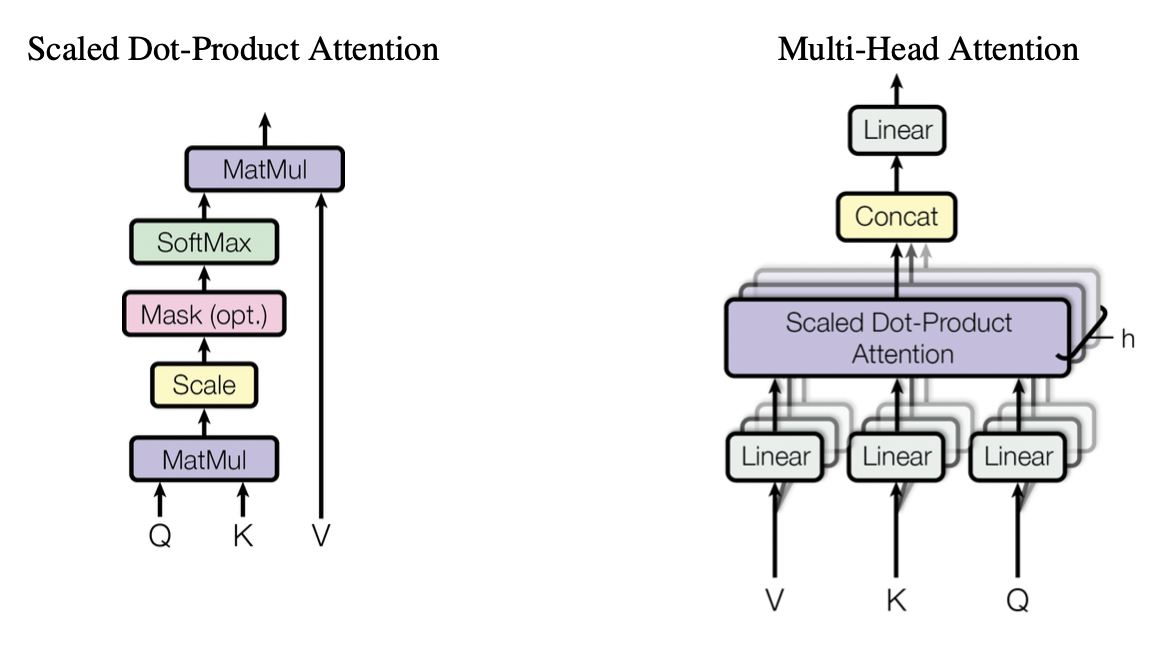

- Scaled Dot-Product Attention

먼저 input으로 Query(Q), Key(K), Value(V) 총 3개가 들어온다. 여기서 Query는 물어보는 주체, Key는 반대로 Query에 의해 물어봄을 당하는 주체, Values는 데이터의 값들을 의미한다.

- Multi-Head Attention

하나의 attention function을 사용하는 것보다, queries와 keys, values를 linear projection을 통해 중간에 매핑해줘서 각 다른 값들을 입력으로 하는, 여러 개의 attention function들을 만드는 것이 더 효율적이라고 한다. 나중에 function의 출력들은 concatenate 되고 다시 linear function을 통해 매핑 한다. 이러한 기법은 CNN이 여러개의 필터를 통해서 convolution output을 구하는 것과 비슷한 효과를 보일 것이다.

-Different Use for multi-head attention


- "self-attention in encoder": 

encoder에서 사용되는 self-attention으로 queries, keys, values 모두 encoder로부터 가져온다. encoder의 각 position은 그 전 layer의 모든 positions들을 참조하고, 이는 해당 position과 모든 position간의 correlation information을 더해주게 된다. 간단하게 설명해서 어떤 한 단어(awesome)이 모든 단어(AI, is, awesome)들 중 어떤 단어들과 correlation이 높고, 또 어떤 단어와는 낮은지를 배우게 된다.

- "self-attention in decoder": 

전체적인 과정과 목표는 encoder의 self-attention과 같다. 하지만 decoder의 경우, sequence model의 auto-regressive property를 보존해야하기 때문에 masking vector를 사용하여 해당 position 이전의 벡터들만을 참조한다(이후에 나올 단어들을 참조하여 예측하는 것은 일종의 치팅). 

- "encoder-decoder attention": 

decoder에서 self-attention 다음으로 사용되는 layer이다. queries는 이전 decoder layer에서 가져오고, keys와 values는 encoder의 output에서 가져온다. 이는 decoder의 모든 position의 vector들로 encoder의 모든 position 값들을 참조함으로써 decoder의 sequence vector들이 encoder의 sequence vector들과 어떠한 correlation을 가지는지를 학습한다.

- Embeddings and Softmax

다른 sequence transduction 모델과 마찬가지로, input과 ouput token을 embedding layer를 거쳐서 사용한다. 이렇게 생성된 embedded vector는 semantic한 특성을 잘 나타내게 된다. 또한, 논문에서는 input embedding 과 output embedding에서 weight matrix를 서로 share하여 사용한다고 한다. embedding이라는 것 자체가 어떠한 단어(token)을 잘 표현할 수 있는 vector를 만드는 것이 목표이므로, input과 output이 어떠한 correlation을 가지고 있기 때문에 weight를 sharing하는 것이 어찌보면 직관적이라고 생각한다.

- Positional Encoding

Transformer는 Recurrent model을 전혀 사용하지 않고 오직 Attention mechanism만을 사용하여 만들기 때문에 Sequence 정보를 담아낼 수가 없다. 따라서 별도로 이러한 sequence 정보를 데이터에 추가해주어야 하는데 이 역할을 하는 것이 바로 "positional encoding"이다.

 

이러한 positional encoding으로 선택할 수 있는 방식은 다양한데, 논문에서는 sine과 cosine 함수를 사용한다.

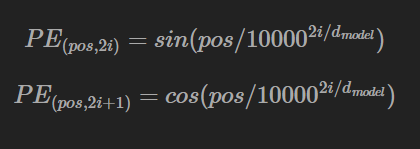


여기서 pos는 position, i는 dimension이다. 논문에서 이 함수를 사용한 이유는 어떠한 고정된 offset k에 대해서 
를 
의 linear function으로 나타낼 수 있기 때문에 모델이 쉽게 상대적인 위치를 참조할 수 있을 것이라 가정했기 때문이라고 한다.

## Why Self-Attention

왜 self-attention이 RNN이나 Convolution보다 좋을까? 


1) the total computational complexity per layer
위 표에서 self-attention과 RNN을 비교해보면, sequence length n이 representation dimensionality d보다 작아야지 complexity가 Self-attention이 RNN보다 더 낮아지게 된다. 보통 n이 d보다 작은 경우가 대부분이기 때문에 self-attention이 complexity가 더 작다고 말할 수 있다. 

 

 

2) the amount of computation that can be parallelized
이전에 설명했듯이, RNN은 input을 순차적으로 입력받아 총 n번 RNN cell을 거치게 되고, self-attention layer는 input의 모든 position 값들을 연결하여 한번에 처리할 수 있다. 따라서 Sequential operations이 O(1)을 가지고, 이는 parallel system에서 유리하게 사용된다.

 

3) the path length between long-range dependencies in the network
long-range dependencies란, 말그대로 position상 멀리 떨어져있는 단어들 간의 dependency를 말하고 이를 학습하는 것은 sequence transduction task에서 key challenge에 해당된다. 이러한 long-dependencey를 잘 배우기 위함에 있어서 length of paths가 큰 영향을 미친다고 한다.


- EX) I LOVE YOU -> 난 너를 사랑해

 


여기서 length of paths란 forward와 backward signals간의 길이를 말하는데, 쉽게 이해하기 위해서 예를 들어보자. 만약 i love you라는 문장을 한국어인 난 너를 사랑해로 translation하는 모델을 학습하고자 한다. 이때, path lengths는 한국어 token들과 영어 token들 간의 길이를 말하는 것이다. 그리고 maximum path length는 "i"와 "사랑해" 사이의 길이인 6(encoder sequence length + decoder sequence length)이 된다.

 

이와 관련된 여러 실험에 따르면, input과 output sequence 사이에 조합 간 paths가 짧을 수록 long-range dependencies를 더 잘 학습할 수 있다고 한다. 따라서 논문에서는 이러한 maximum path lengths도 비교하여 self-attention이 좋은 이유를 설명한다.

 

self-attention은 각 token들을 모든 token들과 참조하여 그 correlation information을 구해서 더해주기 때문에(심지어 encoder-decoder끼리도), maximum path length를 O(1)이라고 볼 수 있다. 따라서 long-range dependencies를 더 쉽게 학습할 수 있다는 장점을 가진다.

 

## Training

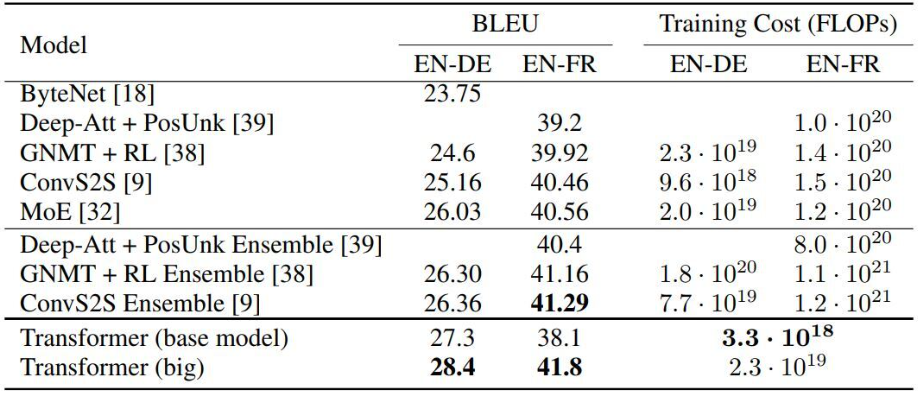

WMT 2014 English - German dataset을 사용했다. NVIDIA P100 GPUs 8대로 기본 모델은 12시간 동안을 BIG 모델은 3.5일이 학습하는데 소요되었다.

성능에 비해 빠른 속도로 우수은 BLEU scores를 획등했고 EN-DE에서는 당시 state-of0the-art를 달성하였다.